In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/plant_stress_dataset"


In [ ]:
train_dir = "/content/drive/MyDrive/plant_stress_dataset/train"
val_dir = "/content/drive/MyDrive/plant_stress_dataset/val"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



Found 1539 images belonging to 5 classes.
Found 439 images belonging to 5 classes.


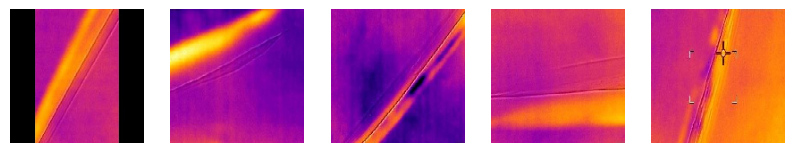

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Plot first 5 images
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Define the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to reduce overfitting
    Dense(train_generator.num_classes, activation='softmax')  # Multi-class classification
])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    steps_per_epoch=49,
    callbacks=[early_stop]
)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.7045 - loss: 0.7687 - val_accuracy: 0.6970 - val_loss: 0.7868
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.7255 - loss: 0.7426 - val_accuracy: 0.6856 - val_loss: 0.7881
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.7238 - loss: 0.7699 - val_accuracy: 0.6993 - val_loss: 0.7922
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.7489 - loss: 0.7062 - val_accuracy: 0.7016 - val_loss: 0.7796
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.7549 - loss: 0.7173 - val_accuracy: 0.7039 - val_loss: 0.7724
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.7337 - loss: 0.7579 - val_accuracy: 0.6925 - val_loss: 0.7694
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.7301 - loss: 0.7064 - val_accuracy: 0.7198 - val_loss: 0.7586
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.7649 - loss: 0.6744 - val_accuracy: 0.

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    steps_per_epoch=49,
    callbacks=[early_stop]
)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.8160 - loss: 0.5033 - val_accuracy: 0.7677 - val_loss: 0.6629
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.8078 - loss: 0.5224 - val_accuracy: 0.7631 - val_loss: 0.6577
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.8160 - loss: 0.5122 - val_accuracy: 0.7517 - val_loss: 0.6791
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.8018 - loss: 0.5205 - val_accuracy: 0.7654 - val_loss: 0.6566
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.8238 - loss: 0.5096 - val_accuracy: 0.7608 - val_loss: 0.6501
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.7923 - loss: 0.5322 - val_accuracy: 0.7699 - val_loss: 0.6597
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.8299 - loss: 0.5034 - val_accuracy: 0.7722 - val_loss: 0.6464
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.8024 - loss: 0.5210 - val_accuracy

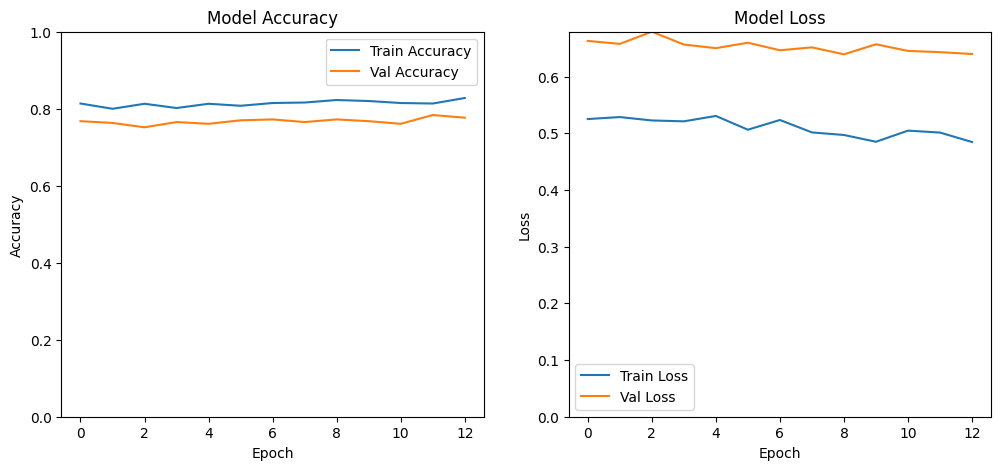

In [ ]:
import matplotlib.pyplot as plt

# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, max(history.history['loss'] + history.history['val_loss']))  # Ensure loss starts at 0
plt.legend()

plt.show()


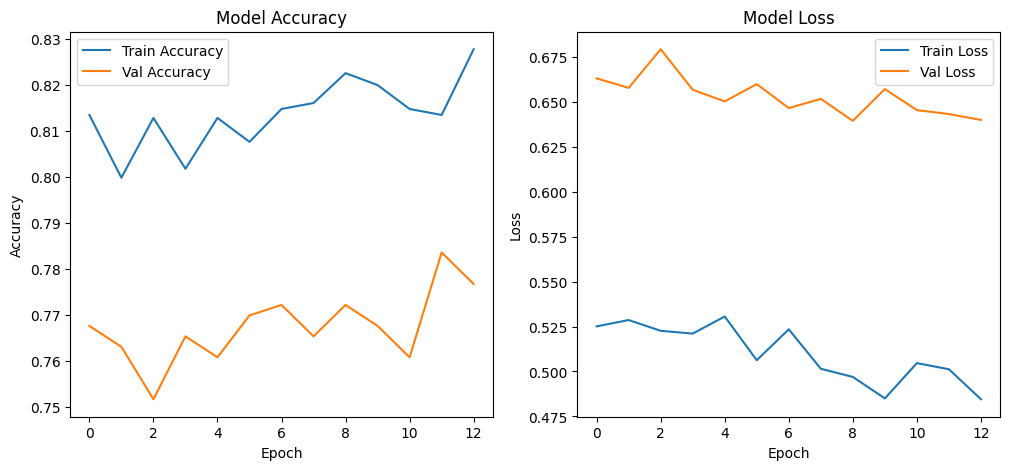

In [ ]:
# Plot Training History
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model.save('/content/drive/MyDrive/paddy_stress_model.keras')


In [ ]:
from tensorflow.keras.models import save_model
save_model(model, '/content/drive/MyDrive/paddy_stress_model.keras')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/paddy_stress_model.keras')

# Print confirmation
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,657,996 (36.84 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,828,999 (18.42 MB)

In [ ]:
# Function to Predict on Multiple Images
def predict_multiple_images(model, img_paths):
    from tensorflow.keras.preprocessing import image

    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        class_idx = np.argmax(prediction)
        class_label = list(train_generator.class_indices.keys())[class_idx]

        print(f"Image: {img_path} --> Predicted Class: {class_label}")

# Example usage with 3 image paths
image_paths = [
    '/content/drive/MyDrive/plant_stress_dataset/test/healthy/thermalimage2a__rot-90.jpg',
    '/content/drive/MyDrive/plant_stress_dataset/test/Blast/Thermalimage10b__flipv.jpg',
    '/content/drive/MyDrive/plant_stress_dataset/test/leaf_spot/thermalimage10b__rot90.jpg'
]

predict_multiple_images(model, image_paths)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
Image: /content/drive/MyDrive/plant_stress_dataset/test/healthy/thermalimage2a__rot-90.jpg --> Predicted Class: healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: /content/drive/MyDrive/plant_stress_dataset/test/Blast/Thermalimage10b__flipv.jpg --> Predicted Class: hispa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: /content/drive/MyDrive/plant_stress_dataset/test/leaf_spot/thermalimage10b__rot90.jpg --> Predicted Class: leaf_spot


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


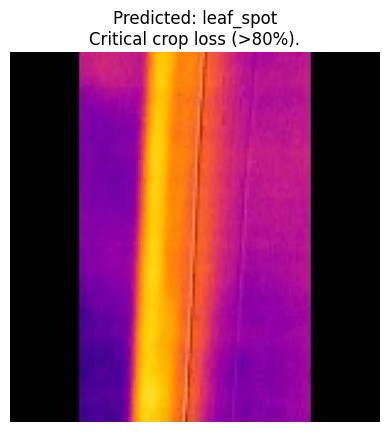

Predicted Class: leaf_spot
Crop Loss Assessment: Critical crop loss (>80%).


In [ ]:
# Function to predict and interpret crop loss
def predict_crop_loss(model, img_path):
    from tensorflow.keras.preprocessing import image
    import matplotlib.pyplot as plt

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[class_idx]

    # Define crop loss severity for each class
    crop_loss_severity = {
        'healthy': "No crop loss.",
        'BLB': "Mild crop loss (10-20%).",
        'Blast': "Moderate crop loss (30-50%).",
        'hispa': "Severe crop loss (60-80%).",
        'leaf_spot': "Critical crop loss (>80%)."
    }

    # Get crop loss description
    loss_description = crop_loss_severity.get(class_label, "Unknown class - crop loss not defined.")

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}\n{loss_description}")
    plt.axis('off')
    plt.show()

    # Print the result
    print(f"Predicted Class: {class_label}")
    print(f"Crop Loss Assessment: {loss_description}")

# Example usage
predict_crop_loss(model, '/content/drive/MyDrive/plant_stress_dataset/test/leaf_spot/thermalimage11d__rot-90.jpg')


✅ Model successfully loaded.
✅ Preprocessed Image Shape: (1, 150, 150, 3)
🔹 Model Expected Input Shape: (None, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
✅ Prediction: leaf_spot - Critical crop loss (>80%).


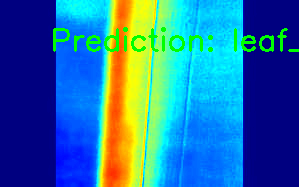

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow  # ✅ Fix for Colab image display

# ✅ Load the trained CNN model
model_path = "/content/drive/MyDrive/paddy_stress_model.keras"
model = load_model(model_path)
print("✅ Model successfully loaded.")

# ✅ Define class labels and crop loss severity mapping
class_labels = ['healthy', 'BLB', 'Blast', 'hispa', 'leaf_spot']
crop_loss_severity = {
    'healthy': "No crop loss.",
    'BLB': "Mild crop loss (10-20%).",
    'Blast': "Moderate crop loss (30-50%).",
    'hispa': "Severe crop loss (60-80%).",
    'leaf_spot': "Critical crop loss (>80%)."
}

# ✅ Function to preprocess the thermal image
def preprocess_image(image_path, target_size=(150, 150)):
    """Loads and preprocesses the thermal image for model prediction."""
    image = cv2.imread(image_path)  # Load the image
    if image is None:
        raise ValueError(f"❌ Error: Unable to load image at {image_path}")

    # Convert to RGB (Ensure consistency with model training)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize to match model input size
    image = cv2.resize(image, target_size)

    # Normalize pixel values (0 to 1)
    image = image / 255.0

    # Expand dimensions to match model input (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)

    print(f"✅ Preprocessed Image Shape: {image.shape}")  # Debugging
    return image

# ✅ Predict function
def predict_stress(image_path):
    """Predicts plant stress from a given thermal image."""
    try:
        preprocessed_image = preprocess_image(image_path)

        # Verify input shape before prediction
        print(f"🔹 Model Expected Input Shape: {model.input_shape}")

        # Ensure input shape matches model requirement
        if preprocessed_image.shape[1:] != model.input_shape[1:]:
            raise ValueError(f"❌ Shape Mismatch! Model expects {model.input_shape}, but got {preprocessed_image.shape}")

        # Make prediction
        predictions = model.predict(preprocessed_image)
        predicted_class = np.argmax(predictions, axis=-1)[0]
        predicted_label = class_labels[predicted_class]

        # Get severity level
        severity_message = crop_loss_severity[predicted_label]

        print(f"✅ Prediction: {predicted_label} - {severity_message}")

        # ✅ Display Image with Prediction (Fix for Colab)
        image = cv2.imread(image_path)
        image = cv2.applyColorMap(image, cv2.COLORMAP_JET)  # Apply color map for visualization
        cv2.putText(image, f"Prediction: {predicted_label}", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        cv2_imshow(image)  # ✅ Use cv2_imshow() instead of cv2.imshow()

    except Exception as e:
        print(f"❌ Error in prediction: {str(e)}")

# ✅ Run prediction on a sample image
image_path = "/content/drive/MyDrive/plant_stress_dataset/test/leaf_spot/thermalimage11d__rot-90.jpg"
predict_stress(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Prediction: Blast - Moderate crop loss (30-50%).


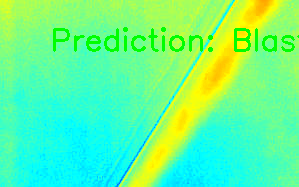

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

model_path = "/content/drive/MyDrive/paddy_stress_model.keras"
model = load_model(model_path)

class_labels = ['healthy', 'BLB', 'Blast', 'hispa', 'leaf_spot']
crop_loss_severity = {
    'healthy': "No crop loss.",
    'BLB': "Mild crop loss (10-20%).",
    'Blast': "Moderate crop loss (30-50%).",
    'hispa': "Severe crop loss (60-80%).",
    'leaf_spot': "Critical crop loss (>80%)."
}

def preprocess_image(image_path, target_size=(150, 150)):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error: Unable to load image at {image_path}")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

def predict_stress(image_path):
    try:
        preprocessed_image = preprocess_image(image_path)

        if preprocessed_image.shape[1:] != model.input_shape[1:]:
            raise ValueError(f"Shape Mismatch! Model expects {model.input_shape}, but got {preprocessed_image.shape}")

        predictions = model.predict(preprocessed_image)
        predicted_class = np.argmax(predictions, axis=-1)[0]
        predicted_label = class_labels[predicted_class]
        severity_message = crop_loss_severity[predicted_label]

        print(f"Prediction: {predicted_label} - {severity_message}")

        image = cv2.imread(image_path)
        image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
        cv2.putText(image, f"Prediction: {predicted_label}", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        cv2_imshow(image)

    except Exception as e:
        print(f"Error in prediction: {str(e)}")

image_path = "/content/drive/MyDrive/plant_stress_dataset/test/Blast/Thermalimage10b__flipv.jpg"
predict_stress(image_path)
